<a href="https://colab.research.google.com/github/annahunn20/Infosys_springboard-6.0-assignments/blob/main/plantdisease(MCC).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Import required libraries
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files
files.download('model.h5')
import io
from PIL import Image
import os
import zipfile
from sklearn.model_selection import train_test_split

In [45]:
# 2. Upload and Extract ZIP File
print("Please upload your PlantVillage dataset ZIP file (ensure it's < 500 MB for faster upload):")
uploaded = files.upload()
zip_path = list(uploaded.keys())[0]

Please upload your PlantVillage dataset ZIP file (ensure it's < 500 MB for faster upload):


Saving final_1.zip to final_1 (1).zip


In [46]:
# Extract the ZIP file
extract_dir = '/content/plantvillage'
os.makedirs(extract_dir, exist_ok=True)
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_dir)
print(f"Dataset extracted to {extract_dir}")

Dataset extracted to /content/plantvillage


In [47]:
# Load dataset using keras.preprocessing
image_size = (128, 128)
batch_size = 16
dataset = keras.preprocessing.image_dataset_from_directory(
    extract_dir,
    labels='inferred',
    label_mode='categorical',  # For 10-class classification
    image_size=image_size,
    batch_size=batch_size,
    shuffle=True
)

Found 4661 files belonging to 10 classes.


In [48]:
# 4. Split into Train and Test (80-20 split)
def dataset_to_numpy(dataset, max_samples=5511):
    images, labels = [], []
    count = 0
    for img, lbl in dataset.unbatch():
        if count >= max_samples:
            break
        images.append(img.numpy())
        labels.append(lbl.numpy())
        count += 1
    return np.array(images), np.array(labels)

In [49]:
# Convert dataset to numpy arrays for splitting
images, labels = dataset_to_numpy(dataset)
x_train, x_test, y_train, y_test = train_test_split(
    images, labels, test_size=0.2, random_state=42, stratify=labels
)

In [50]:
#Normalize pixel values
x_train = x_train / 255.0
x_test = x_test / 255.0

In [51]:
# Verify dataset shape
print(f"Training data shape: {x_train.shape}, Labels: {y_train.shape}")
print(f"Test data shape: {x_test.shape}, Labels: {y_test.shape}")

Training data shape: (3728, 128, 128, 3), Labels: (3728, 10)
Test data shape: (933, 128, 128, 3), Labels: (933, 10)


In [52]:
# Get class names
class_names = dataset.class_names
print(f"Classes: {class_names}")

Classes: ['Tomato_Bacterial_spot', 'Tomato_Early_blight', 'Tomato_Late_blight', 'Tomato__Tomato_YellowLeaf__Curl_Virus', 'Tomato_healthy', 'pepper_bell_bacterial_spot', 'pepper_bell_healthy', 'potato_early_blight', 'potato_healthy', 'potato_late_blight']


In [53]:
# 5. Build CNN Model (Simplified for speed)
model = keras.Sequential([
    layers.Input(shape=(128, 128, 3)),
    layers.RandomFlip("horizontal"),
    layers.RandomRotation(0.1),
    layers.Conv2D(16, (3,3), activation='relu'),
    layers.MaxPooling2D(2,2),
    layers.Conv2D(32, (3,3), activation='relu'),
    layers.MaxPooling2D(2,2),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(10, activation='softmax')
])

In [54]:
# 6. Compile
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [ ]:
# 7. Train
history = model.fit(
    x_train, y_train,
    epochs=5,  # Fewer epochs for speed
    batch_size=batch_size,
    validation_data=(x_test, y_test),
    verbose=1
)

Epoch 1/5
233/233 ━━━━━━━━━━━━━━━━━━━━ 62s 265ms/step - accuracy: 0.6935 - loss: 0.8141 - val_accuracy: 0.8253 - val_loss: 0.4984
Epoch 2/5
233/233 ━━━━━━━━━━━━━━━━━━━━ 80s 257ms/step - accuracy: 0.7326 - loss: 0.7093 - val_accuracy: 0.8156 - val_loss: 0.4856
Epoch 3/5
233/233 ━━━━━━━━━━━━━━━━━━━━ 85s 271ms/step - accuracy: 0.7267 - loss: 0.7345 - val_accuracy: 0.7621 - val_loss: 0.6393
Epoch 4/5
233/233 ━━━━━━━━━━━━━━━━━━━━ 80s 264ms/step - accuracy: 0.7512 - loss: 0.6584 - val_accuracy: 0.7953 - val_loss: 0.5314
Epoch 5/5
233/233 ━━━━━━━━━━━━━━━━━━━━ 62s 267ms/step - accuracy: 0.7403 - loss: 0.6814 - val_accuracy: 0.7974 - val_loss: 0.4979


In [ ]:
# 8. Evaluate
loss, acc = model.evaluate(x_test, y_test, verbose=0)
print(f"✅ Test Accuracy: {acc:.4f}")

✅ Test Accuracy: 0.7974


In [ ]:
model.save('model.h5')

In [ ]:
# 9. Function to preprocess uploaded image
def preprocess_image(image):
    img = Image.open(io.BytesIO(image)).convert('RGB')
    img = img.resize(image_size)
    img_array = np.array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)  # Shape: (1, 128, 128, 3)
    return img_array


=== User Prediction Section ===
Upload a plant image to predict its disease:


Saving 0a79700b-f834-41f5-ae51-6ceda6f67a48___RS_Early.B 8951.JPG to 0a79700b-f834-41f5-ae51-6ceda6f67a48___RS_Early.B 8951.JPG
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


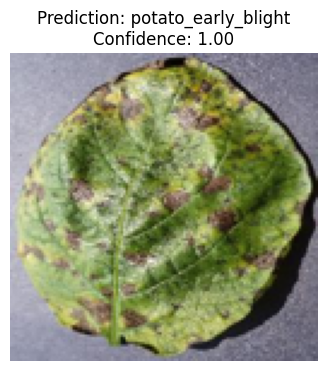

In [ ]:
# 10. User Prediction Section
print("\n=== User Prediction Section ===")
print("Upload a plant image to predict its disease:")
uploaded = files.upload()
for fn in uploaded.keys():
    img_array = preprocess_image(uploaded[fn])
    pred_probs = model.predict(img_array)[0]
    pred_class_idx = np.argmax(pred_probs)
    pred_class = class_names[pred_class_idx]
    pred_conf = pred_probs[pred_class_idx]

    plt.figure(figsize=(4,4))
    plt.imshow(img_array.squeeze())
    plt.axis("off")
    plt.title(f"Prediction: {pred_class}\nConfidence: {pred_conf:.2f}")
    plt.show()